In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df = pd.read_csv("../data/interim/filtered.csv").drop(["Unnamed: 0"], axis =1)

### Verificacao da doenca

#### Diagnóstico official de Parksion -- "Do you currently have a diagnosis of Parkinson's disease, or parkinsonism, by a physician or other health care professional (most recent PD diagnosis)

In [11]:
df["CurrPDDiag"].unique()

array([ 0.,  1., nan])

In [13]:
df["CurrPDDiag"].value_counts()

1.0    33285
0.0    12865
Name: CurrPDDiag, dtype: int64

In [21]:
df = df.query("CurrPDDiag == 1.0")

In [25]:
df.drop(["CurrPDDiag", 'Health', "HealthPNA", "compbypa"], axis =1, inplace=True)

C:\Users\Little Ball\AppData\Local\Temp\ipykernel_17088\1665483930.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(["CurrPDDiag", 'Health', "HealthPNA", "compbypa"], axis =1, inplace=True)


In [26]:
df

,age,Mobility,Care,Active,Pain,Anxious,CGIPD,Anxiety,AnxietyDia,AnxietyAge,...,pa4c,pa5a,pa5b,pa5c,pa6a,pa6b,pa6c,pa7a,pa7b,pa7c
1,82.1,1.0,0.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,63.3,2.0,1.0,1.0,2.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,49.4,1.0,0.0,1.0,3.0,2.0,NaN,1.0,1.0,45.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,87.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,62.8,0.0,0.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46146,62.1,1.0,1.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46148,81.2,4.0,4.0,4.0,2.0,2.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46149,70.1,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46150,67.6,0.0,0.0,1.0,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
df = df.fillna('-1')

In [46]:
col = df.columns

for i in col:
    df[i] = pd.to_numeric(df[i])

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33285 entries, 1 to 46151
Data columns (total 90 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       33285 non-null  float64
 1   Mobility                  33285 non-null  float64
 2   Care                      33285 non-null  float64
 3   Active                    33285 non-null  float64
 4   Pain                      33285 non-null  float64
 5   Anxious                   33285 non-null  float64
 6   CGIPD                     33285 non-null  float64
 7   Anxiety                   33285 non-null  float64
 8   AnxietyDia                33285 non-null  float64
 9   AnxietyAge                33285 non-null  float64
 10  AnxietyStat               33285 non-null  float64
 11  Depress                   33285 non-null  float64
 12  DepressDia                33285 non-null  float64
 13  DepressAge                33285 non-null  float64
 14  Depres

### Correlacao entre as colunas

In [48]:
df.columns

Index(['age', 'Mobility', 'Care', 'Active', 'Pain', 'Anxious', 'CGIPD',
       'Anxiety', 'AnxietyDia', 'AnxietyAge', 'AnxietyStat', 'Depress',
       'DepressDia', 'DepressAge', 'DepressStat', 'DepressionHx',
       'DepressionHxTrt', 'DepressionHxLim', 'AnxietyHx', 'AnxietyHxTrt',
       'AnxietyHxLim', 'LeisureDay', 'LeisureHours', 'WalkDay', 'WalkHours',
       'LightSportDay', 'LightSportHours', 'ModSportDay', 'ModSportHours',
       'StrenSportDay', 'StrenSportHours', 'StrengthDay', 'StrengthHours',
       'HouseLight', 'HouseHeavy', 'HouseRepair', 'HouseLawn', 'HouseGarden',
       'HouseCare', 'Work', 'WorkActive', 'MindStress',
       'MindAnxietyPDSympTremor', 'MindAnxietyPDSympWalk',
       'MindAnxietyPDSympSlow', 'MindAnxietyPDSympExcess',
       'MindAnxietyPDSympDepress', 'MindAnxietyPDSympSleep',
       'MindAnxietyPDSympOther', 'ABRGPDReImproEx', 'ABRGYouExOften',
       'ABRGYouExLight', 'ABRGYouExMod', 'ABRGYouExStren', 'ABRGYouExMuscle',
       'ABRGYouExOther', 'AB

In [60]:
len(df.columns)

90

In [55]:
auxx=df[['Mobility', 'Care', 'Active', 'Pain', 'Anxious', 'CGIPD',
       'Anxiety']]

In [56]:
auxx.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33285 entries, 1 to 46151
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Mobility  33285 non-null  float64
 1   Care      33285 non-null  float64
 2   Active    33285 non-null  float64
 3   Pain      33285 non-null  float64
 4   Anxious   33285 non-null  float64
 5   CGIPD     33285 non-null  float64
 6   Anxiety   33285 non-null  float64
dtypes: float64(7)
memory usage: 2.0 MB


In [61]:
a = df.columns

In [ ]:
git config --global user.email "juliamff@hotmail.com"
git config --global user.name "juliamff"

In [64]:
a = df.columns[0:10]

0 10


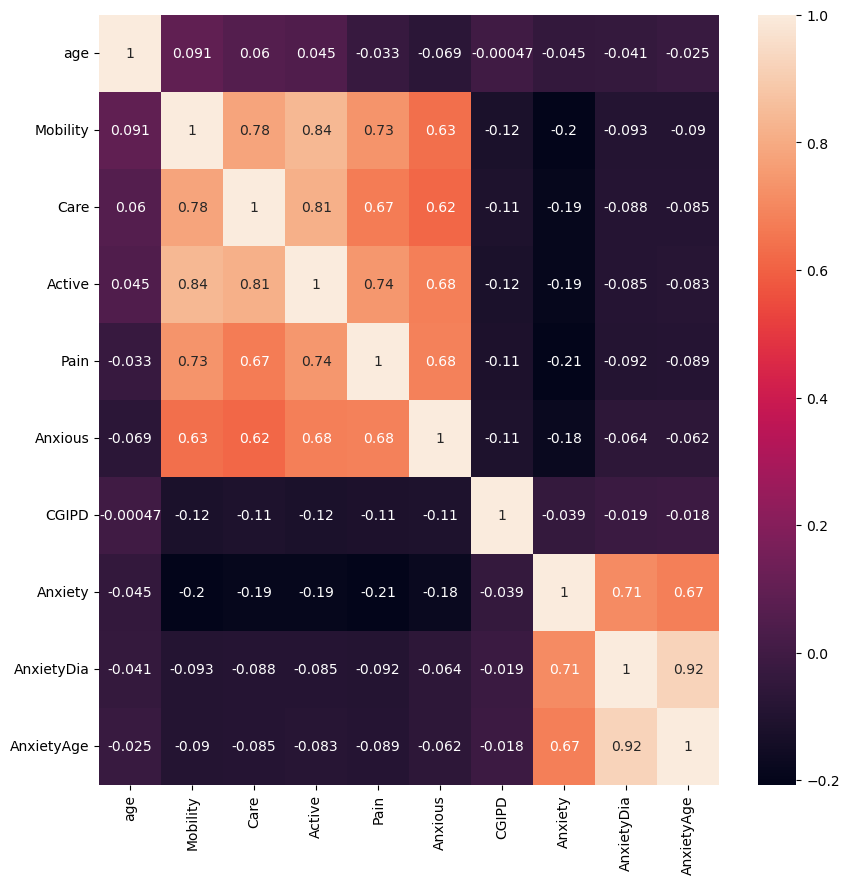

10 20


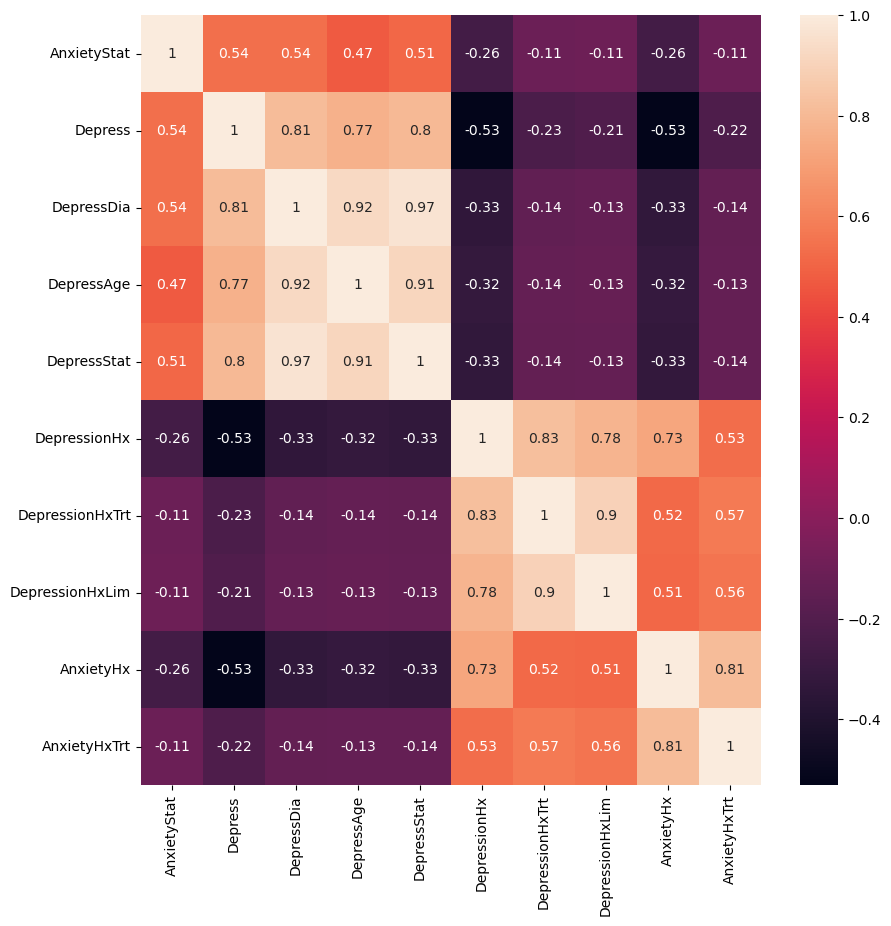

20 30


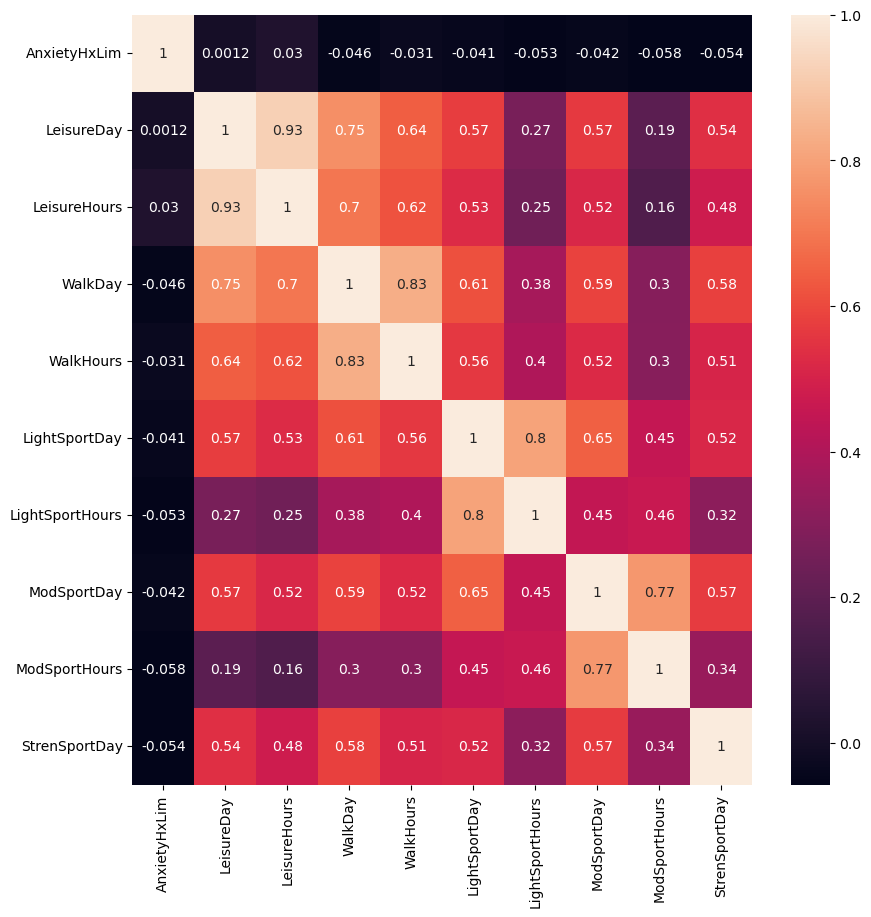

30 40


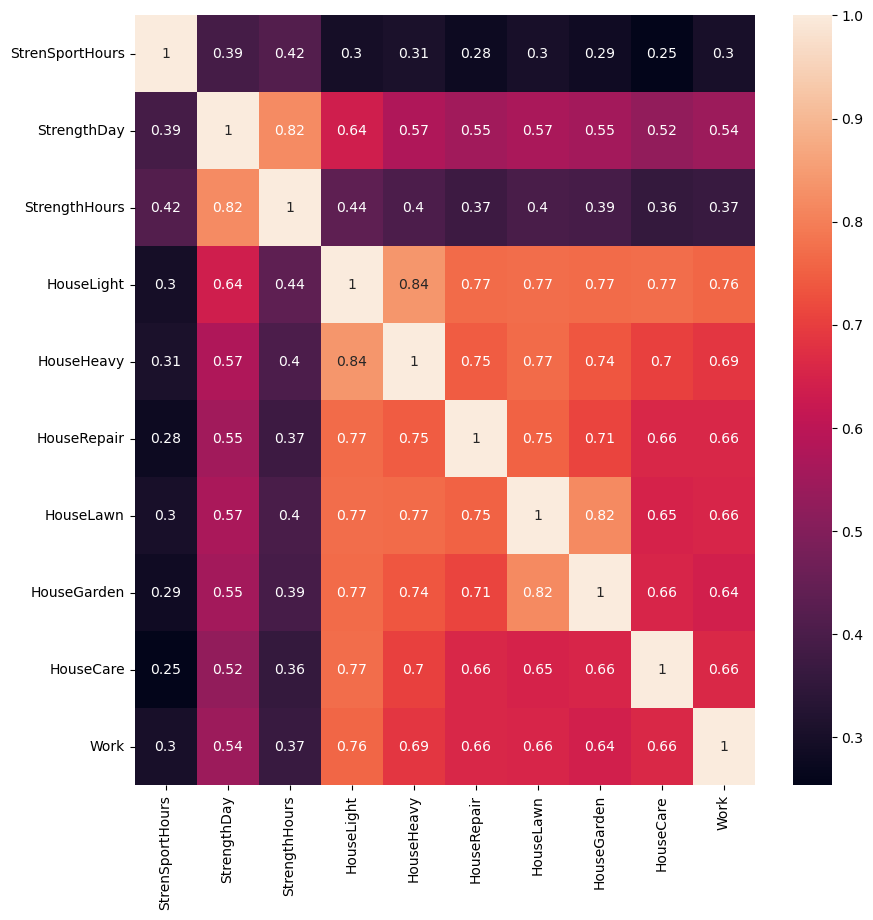

40 50


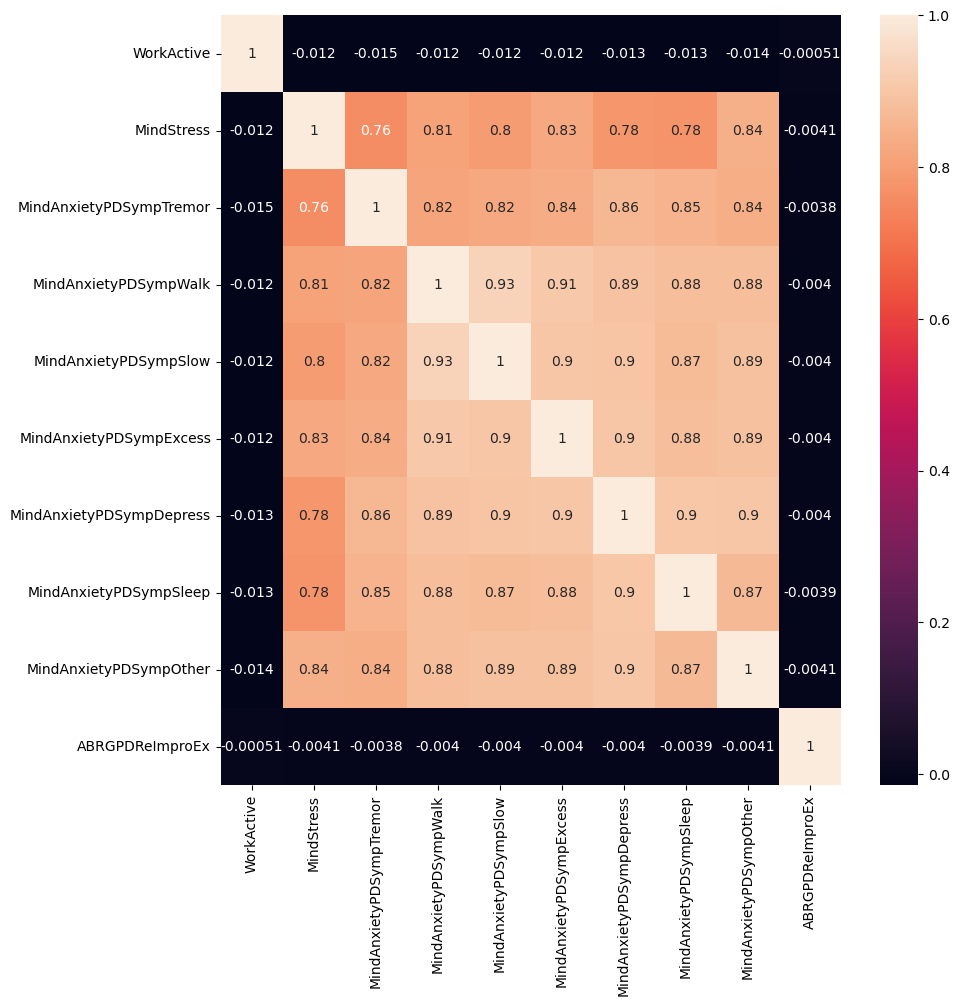

50 60


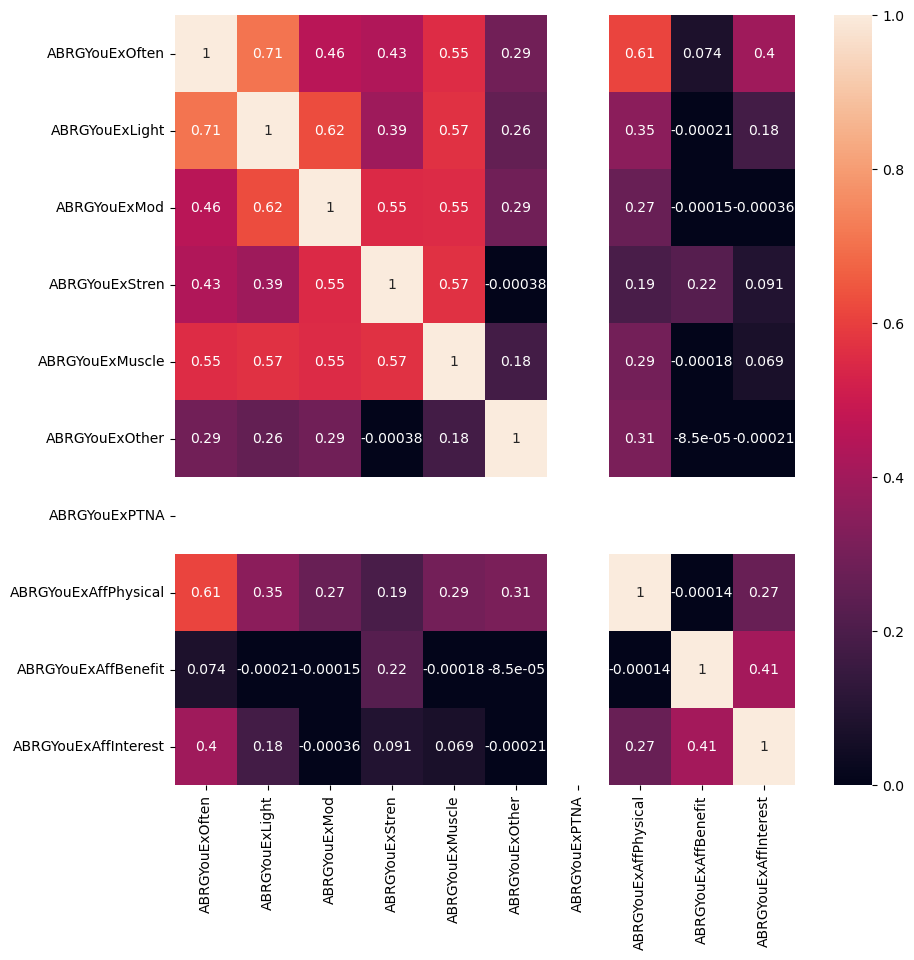

60 70


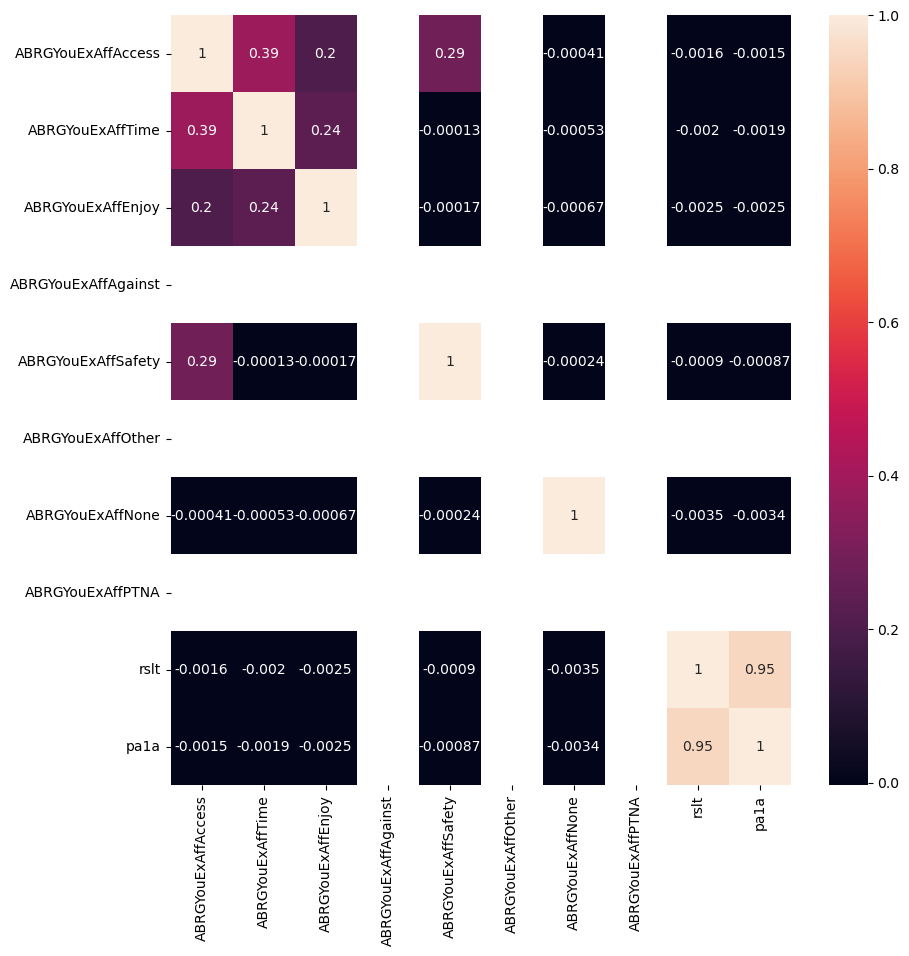

70 80


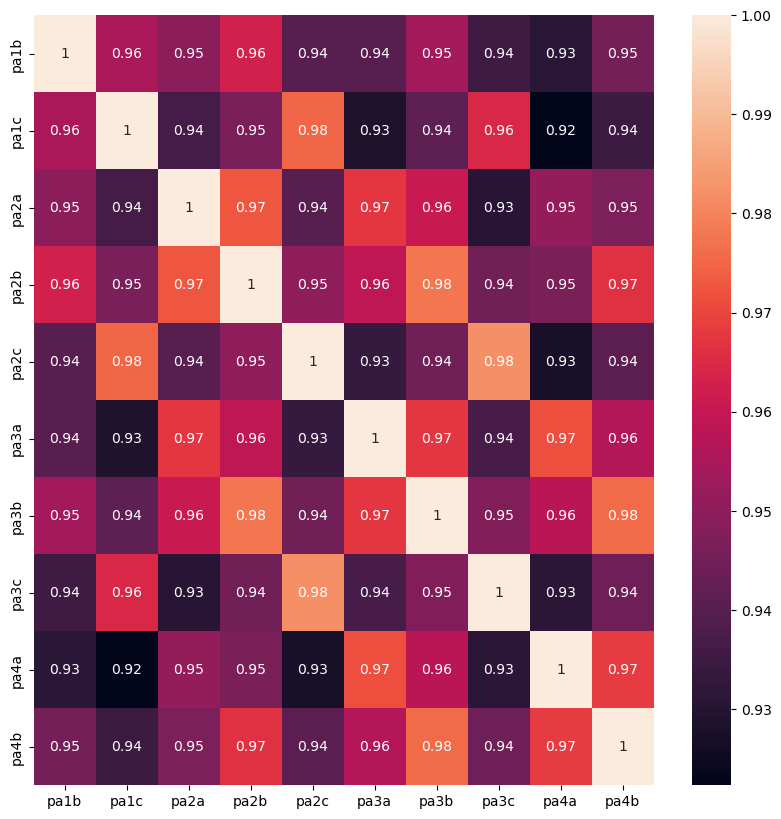

80 90


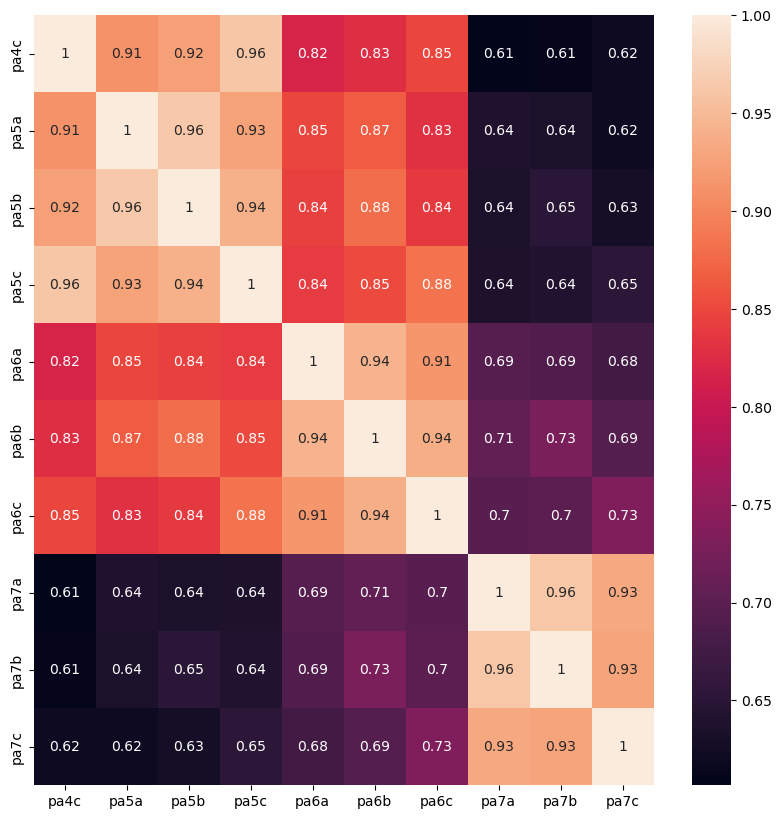

In [73]:

for i in range(0, 90, 10):
    col = df.columns[i:i+10]
    aux = df[col]
    print(i, i+10)
    fig, ax = plt.subplots(figsize=(10, 10))
    sns.heatmap(data=aux.corr(),annot=True,) 
    plt.show() 

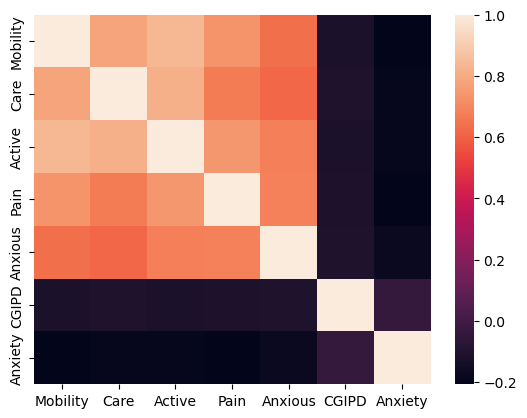

In [59]:
sns.heatmap(data=auxx.corr()) 
plt.show() 

In [35]:
auxx.fillna('-1')

,age,Mobility,Care,Active,Pain,Anxious,CGIPD,Anxiety
1,82.1,1.0,0.0,1.0,1.0,1.0,-1,-1
2,63.3,2.0,1.0,1.0,2.0,0.0,-1,-1
3,49.4,1.0,0.0,1.0,3.0,2.0,-1,1.0
6,87.7,-1,-1,-1,-1,-1,-1,-1
7,62.8,0.0,0.0,1.0,0.0,0.0,-1,-1
...,...,...,...,...,...,...,...,...
46146,62.1,1.0,1.0,0.0,0.0,1.0,-1,-1
46148,81.2,4.0,4.0,4.0,2.0,2.0,-1,-1
46149,70.1,-1,-1,-1,-1,-1,-1,0.0
46150,67.6,0.0,0.0,1.0,1.0,0.0,-1,-1


In [ ]:
age == rslt (age group)